### Import library 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qiskit
from qiskit import IBMQ


In [2]:
%matplotlib inline
from IPython.display import  display as disp

## Basic Quantum Circuit 

#### Circuit Type 1

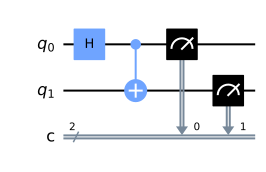

In [3]:
qc = qiskit.QuantumCircuit(2,2)
qc.h(0)         # Hadamard Gate
qc.cx(0,1)      # Controled Not 
# qc.h(0)
qc.measure(range(2), range(2))  # Measurement on classical bit 
qc.draw()

Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='8d269a3b-1dae-45e2-a962-f8c79c3847c7', job_id='59a7d92a-38f9-4171-a4c7-f83bb9f5d91d', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 511, '0x3': 513}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-88', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=1832864789, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'parallel_state_update': 4, 'sample_measure_time': 0.000789855, 'num_qubits': 2, 'device': 'CPU', 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.002657248)], date=2023-03-16T13:33:21.625765, sta

{'00': 511, '11': 513}

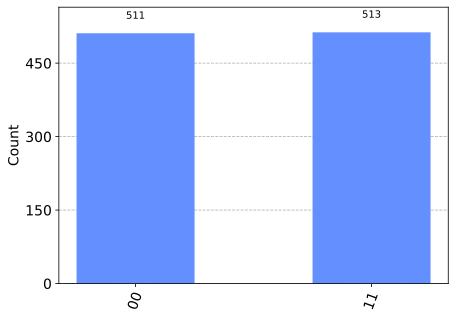

In [4]:
backend_simulator = qiskit.Aer.get_backend('qasm_simulator')
job_simulator = qiskit.execute(qc, backend_simulator, shots=1024)
result = job_simulator.result()
display(result)
count = result.get_counts(qc)
display(count)
qiskit.visualization.plot_histogram(count)

### Circuit Type 2

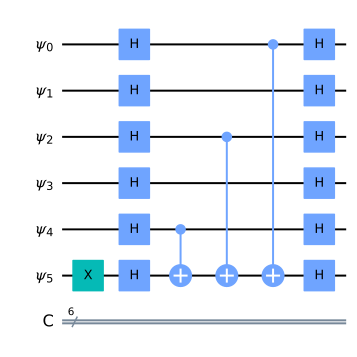

In [6]:
qubits = qiskit.QuantumRegister(6, name = "\mathcal{\psi}")
cbits = qiskit.ClassicalRegister(6,name='C')
circuit = qiskit.QuantumCircuit(qubits, cbits)
circuit.x(5);circuit.barrier();
circuit.h(range(6))
circuit.cx([4,2,0],5)
circuit.barrier()
circuit.h(range(6))
circuit.draw(output = "mpl",plot_barriers = False )

# print(circuit)


### Quantum State Visualization

In [ ]:
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector

In [10]:
qc=qiskit.QuantumCircuit(1)
statevector_simulator = qiskit.Aer.get_backend("statevector_simulator")
result = qiskit.execute(qc,statevector_simulator).result()
statevector_result = result.get_statevector(qc)
statevector_result

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


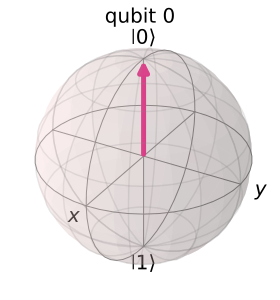

In [35]:
plot_bloch_multivector(statevector_result)

## Execute on real Hardware

In [5]:
# Loading your IBM Quantum account(s)
IBMQ.load_account()
provider=IBMQ.get_provider()

/tmp/ipykernel_20183/3146749005.py:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
/tmp/ipykernel_20183/3146749005.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


In [6]:
provider.backends()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [7]:
backend = provider.get_backend('ibmq_quito')

In [ ]:
job_simulator = qiskit.execute(qc, backend, shots=1024)
result = job_simulator.result()
count = result.get_counts(qc)
count